In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
import math
import gzip
import os
import time

In [70]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [71]:
def calc_ci(array, z=1.96): # Z = 1.96 for 95% CI
    x_bar = np.mean(array)
    s = np.std(array)
    n = len(array)
    lower = x_bar - (z * (s/math.sqrt(n)))
    upper = x_bar + (z * (s/math.sqrt(n)))
    med = np.median(array)
    return lower, med, upper

In [72]:
labels = pd.read_csv('/home/rjsietsma/capice_projects/capice_diagnostics/datafiles_old/test.txt.gz', sep='\t')
labels

/home/rjsietsma/PycharmProjects/capice_updatr/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (55,63,73,112) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#Chrom,Allergy/Immunology/Infectious,Alt,AnnoType,Audiologic/Otolaryngologic,Biochemical,CCDS,CDSpos,Cardiovascular,ConsDetail,...,relProtPos,relcDNApos,revel,sift,source,tOverlapMotifs,targetScan,to_be_deleted,verPhCons,verPhyloP
0,21,False,G,CodingTranscript,False,False,CCDS13617.1,872.0,False,stop_lost,...,1.003448,0.883570,NaN,NaN,unknown,NaN,NaN,False,1.000,1.521
1,X,False,C,CodingTranscript,False,False,CCDS55462.1,1971.0,False,synonymous,...,0.572300,0.373821,NaN,0.000,clinvar,NaN,NaN,False,0.004,-1.525
2,17,False,T,CodingTranscript,False,False,CCDS42292.1,843.0,True,synonymous,...,0.098979,0.098672,NaN,0.647,clinvar,NaN,NaN,False,0.991,-0.055
3,21,False,T,CodingTranscript,False,False,CCDS13635.1,222.0,True,synonymous,...,0.601626,0.344434,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.309
4,1,False,A,CodingTranscript,False,False,CCDS39.1,768.0,True,synonymous,...,0.351648,0.149653,NaN,0.000,clinvar,NaN,NaN,False,0.997,0.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,17,False,A,CodingTranscript,False,False,CCDS42292.1,2709.0,True,synonymous,...,0.318070,0.248853,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.989
10838,11,True,T,CodingTranscript,False,False,CCDS7753.1,75.0,True,synonymous,...,0.170068,0.199045,NaN,0.000,clinvar,NaN,NaN,False,0.943,0.189
10839,15,False,C,CodingTranscript,False,False,CCDS32232.1,2673.0,True,synonymous,...,0.310345,0.266162,NaN,0.664,clinvar,NaN,NaN,False,0.999,4.269
10840,19,True,A,CodingTranscript,False,False,CCDS12366.1,1767.0,False,synonymous,...,0.524021,0.343704,NaN,0.000,clinvar,NaN,NaN,False,0.996,-0.044


In [73]:
labels['binarized_label'].value_counts()

0    5421
1    5421
Name: binarized_label, dtype: int64

In [74]:
labels['chr_pos_ref_alt'] = labels[['#Chrom', 'Pos', 'Ref', 'Alt']].astype(str).agg('_'.join, axis=1)
labels

,#Chrom,Allergy/Immunology/Infectious,Alt,AnnoType,Audiologic/Otolaryngologic,Biochemical,CCDS,CDSpos,Cardiovascular,ConsDetail,...,relProtPos,relcDNApos,revel,sift,source,tOverlapMotifs,targetScan,to_be_deleted,verPhCons,verPhyloP
0,21,False,G,CodingTranscript,False,False,CCDS13617.1,872.0,False,stop_lost,...,1.003448,0.883570,NaN,NaN,unknown,NaN,NaN,False,1.000,1.521
1,X,False,C,CodingTranscript,False,False,CCDS55462.1,1971.0,False,synonymous,...,0.572300,0.373821,NaN,0.000,clinvar,NaN,NaN,False,0.004,-1.525
2,17,False,T,CodingTranscript,False,False,CCDS42292.1,843.0,True,synonymous,...,0.098979,0.098672,NaN,0.647,clinvar,NaN,NaN,False,0.991,-0.055
3,21,False,T,CodingTranscript,False,False,CCDS13635.1,222.0,True,synonymous,...,0.601626,0.344434,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.309
4,1,False,A,CodingTranscript,False,False,CCDS39.1,768.0,True,synonymous,...,0.351648,0.149653,NaN,0.000,clinvar,NaN,NaN,False,0.997,0.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,17,False,A,CodingTranscript,False,False,CCDS42292.1,2709.0,True,synonymous,...,0.318070,0.248853,NaN,0.000,clinvar,NaN,NaN,False,1.000,1.989
10838,11,True,T,CodingTranscript,False,False,CCDS7753.1,75.0,True,synonymous,...,0.170068,0.199045,NaN,0.000,clinvar,NaN,NaN,False,0.943,0.189
10839,15,False,C,CodingTranscript,False,False,CCDS32232.1,2673.0,True,synonymous,...,0.310345,0.266162,NaN,0.664,clinvar,NaN,NaN,False,0.999,4.269
10840,19,True,A,CodingTranscript,False,False,CCDS12366.1,1767.0,False,synonymous,...,0.524021,0.343704,NaN,0.000,clinvar,NaN,NaN,False,0.996,-0.044


In [75]:
for col in labels.columns:
    print(col)

#Chrom
Allergy/Immunology/Infectious
Alt
AnnoType
Audiologic/Otolaryngologic
Biochemical
CCDS
CDSpos
Cardiovascular
ConsDetail
ConsScore
Consequence
CpG
Craniofacial
Dental
Dermatologic
Dist2Mutation
Domain
Dst2SplType
Dst2Splice
EncExp
EncH3K27Ac
EncH3K4Me1
EncH3K4Me3
EncNucleo
EncOCC
EncOCCombPVal
EncOCDNasePVal
EncOCDNaseSig
EncOCFairePVal
EncOCFaireSig
EncOCctcfPVal
EncOCctcfSig
EncOCmycPVal
EncOCmycSig
EncOCpolIIPVal
EncOCpolIISig
Endocrine
Exon
FeatureID
Freq10000bp
Freq1000bp
Freq100bp
GC
Gastrointestinal
GeneID
GeneName
General
Genitourinary
GerpN
GerpRS
GerpRSpval
GerpS
Grantham
Hematologic
Intron
Length
Musculoskeletal
Neurologic
Obstetric
Oncologic
Ophthalmologic
PHRED
PolyPhenCat
PolyPhenVal
Pos
Pulmonary
Rare10000bp
Rare1000bp
Rare100bp
RawScore
Ref
Renal
SIFTcat
SIFTval
Segway
Sngl10000bp
Sngl1000bp
Sngl100bp
Stars
TFBS
TFBSPeaks
TFBSPeaksMax
Type
allvalid
bStatistic
binarized_label
cDNApos
cHmmBivFlnk
cHmmEnh
cHmmEnhBiv
cHmmEnhG
cHmmHet
cHmmQuies
cHmmReprPC
cHmmReprPCWk


In [76]:
data = pd.read_csv('/home/rjsietsma/capice_projects/capice_diagnostics/datafiles_old/test_capice.txt.gz', sep='\t')
data

,chr_pos_ref_alt,GeneName,FeatureID,Consequence,probabilities
0,21_33974174_C_G,C21orf59,ENST00000290155,STOP_LOST,0.003275
1,X_99661625_G_C,PCDH19,ENST00000373034,SYNONYMOUS,0.000075
2,17_29509638_C_T,NF1,ENST00000358273,SYNONYMOUS,0.001511
3,21_35742999_C_T,KCNE2,ENST00000290310,SYNONYMOUS,0.000621
4,1_2160973_G_A,SKI,ENST00000378536,SYNONYMOUS,0.000012
...,...,...,...,...,...
10837,17_29556342_G_A,NF1,ENST00000358273,SYNONYMOUS,0.000139
10838,11_5248177_A_T,HBB,ENST00000335295,SYNONYMOUS,0.069934
10839,15_48787324_T_C,FBN1,ENST00000316623,SYNONYMOUS,0.909190
10840,19_17947957_G_A,JAK3,ENST00000458235,SYNONYMOUS,0.001238


In [77]:
merge = data.merge(labels[['chr_pos_ref_alt', 'binarized_label']])
merge

,chr_pos_ref_alt,GeneName,FeatureID,Consequence,probabilities,binarized_label
0,21_33974174_C_G,C21orf59,ENST00000290155,STOP_LOST,0.003275,0
1,X_99661625_G_C,PCDH19,ENST00000373034,SYNONYMOUS,0.000075,0
2,17_29509638_C_T,NF1,ENST00000358273,SYNONYMOUS,0.001511,0
3,21_35742999_C_T,KCNE2,ENST00000290310,SYNONYMOUS,0.000621,0
4,1_2160973_G_A,SKI,ENST00000378536,SYNONYMOUS,0.000012,0
...,...,...,...,...,...,...
10837,17_29556342_G_A,NF1,ENST00000358273,SYNONYMOUS,0.000139,1
10838,11_5248177_A_T,HBB,ENST00000335295,SYNONYMOUS,0.069934,1
10839,15_48787324_T_C,FBN1,ENST00000316623,SYNONYMOUS,0.909190,1
10840,19_17947957_G_A,JAK3,ENST00000458235,SYNONYMOUS,0.001238,1


In [78]:
merge[['chr', 'pos', 'ref', 'alt']] = merge['chr_pos_ref_alt'].str.split('_', expand=True)
merge.drop(columns='chr_pos_ref_alt', inplace=True)
merge

,GeneName,FeatureID,Consequence,probabilities,binarized_label,chr,pos,ref,alt
0,C21orf59,ENST00000290155,STOP_LOST,0.003275,0,21,33974174,C,G
1,PCDH19,ENST00000373034,SYNONYMOUS,0.000075,0,X,99661625,G,C
2,NF1,ENST00000358273,SYNONYMOUS,0.001511,0,17,29509638,C,T
3,KCNE2,ENST00000290310,SYNONYMOUS,0.000621,0,21,35742999,C,T
4,SKI,ENST00000378536,SYNONYMOUS,0.000012,0,1,2160973,G,A
...,...,...,...,...,...,...,...,...,...
10837,NF1,ENST00000358273,SYNONYMOUS,0.000139,1,17,29556342,G,A
10838,HBB,ENST00000335295,SYNONYMOUS,0.069934,1,11,5248177,A,T
10839,FBN1,ENST00000316623,SYNONYMOUS,0.909190,1,15,48787324,T,C
10840,JAK3,ENST00000458235,SYNONYMOUS,0.001238,1,19,17947957,G,A


In [79]:
merge['order'] = merge['chr']
merge.loc[merge[merge['order'] == 'X'].index, 'order'] = 23
merge.loc[merge[merge['order'] == 'Y'].index, 'order'] = 24
merge.loc[merge[merge['order'] == 'MT'].index, 'order'] = 25
merge['order'] = merge['order'].astype(int)
merge.sort_values(by=['order', 'pos'], inplace=True)
merge.drop(columns='order', inplace=True)
merge.index = range(0, merge.shape[0])
merge

,GeneName,FeatureID,Consequence,probabilities,binarized_label,chr,pos,ref,alt
0,AGL,ENST00000294724,NON_SYNONYMOUS,0.000446,0,1,100340326,G,A
1,AGL,ENST00000294724,FRAME_SHIFT,0.973992,1,1,100342111,TG,T
2,AGL,ENST00000294724,STOP_GAINED,0.910350,1,1,100346885,G,A
3,AGL,ENST00000294724,FRAME_SHIFT,0.684197,1,1,100346952,G,GA
4,AGL,ENST00000294724,CANONICAL_SPLICE,0.812289,1,1,100349675,G,A
...,...,...,...,...,...,...,...,...,...
10837,PCDH19,ENST00000373034,SYNONYMOUS,0.000075,0,X,99661625,G,C
10838,PCDH19,ENST00000373034,NON_SYNONYMOUS,0.863940,0,X,99662275,C,G
10839,PCDH19,ENST00000373034,STOP_GAINED,0.998694,0,X,99663098,G,GT
10840,SRPX2,ENST00000373004,NON_SYNONYMOUS,0.001957,0,X,99917338,G,A


In [80]:
merge['sample'] = merge.index

In [81]:
benign_scores = merge[merge['binarized_label'] == 0]['probabilities']
percentile_benign = np.percentile(benign_scores, 5)
benign_lower_ci, benign_med, benign_upper_ci = calc_ci(benign_scores)

In [82]:
patho_scores = merge[merge['binarized_label'] == 1]['probabilities']
percentile_patho = np.percentile(patho_scores, 95)
patho_lower_ci, patho_med, patho_upper_ci = calc_ci(patho_scores)

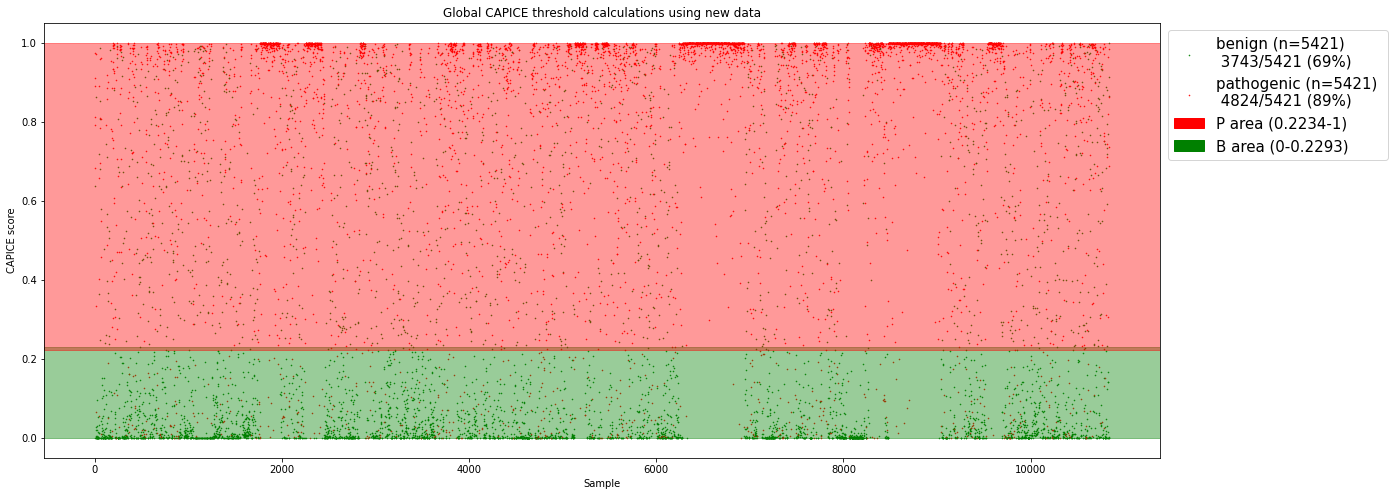

In [83]:
dot_size = 0.3
n_decimals = 4

plt.rcParams['figure.figsize'] = (20,8)

if percentile_benign - benign_lower_ci < 0:
    plot_b_lower_bound = 0
else:
    plot_b_lower_bound - benign_lower_ci
plot_b_upper_bound = percentile_benign + benign_upper_ci
plt.axhspan(plot_b_lower_bound,
            plot_b_upper_bound,
            0,
            1,
            color='green',
            alpha=0.4
           )

n_benign_correct = merge[(merge['probabilities'] < plot_b_upper_bound) & (merge['binarized_label'] == 0)].shape[0]
n_benign_tot = merge[merge['binarized_label'] == 0].shape[0]

benign_subset = merge[merge['binarized_label'] == 0]
plt.scatter(benign_subset['sample'],
            benign_subset['probabilities'],
            s=dot_size,
            color='green',
            label=f'benign (n={benign_subset.shape[0]}) \n {n_benign_correct}/{n_benign_tot} ({round(n_benign_correct/n_benign_tot*100)}%)'
           )

if percentile_patho + patho_upper_ci > 1:
    plot_p_upper_bound = 1
else:
    plot_p_upper_bound = patho_upper_ci
plot_p_lower_bound = percentile_patho - patho_lower_ci
plt.axhspan(plot_p_lower_bound,
            plot_p_upper_bound,
            0,
            1,
            color='red',
            alpha=0.4
           )

n_patho_correct = merge[(merge['probabilities'] > plot_p_lower_bound) & (merge['binarized_label'] == 1)].shape[0]
n_patho_tot = merge[merge['binarized_label'] == 1].shape[0]

patho_subset = merge[merge['binarized_label'] == 1]
plt.scatter(patho_subset['sample'],
            patho_subset['probabilities'],
            s=dot_size,
            color='red',
            label=f'pathogenic (n={patho_subset.shape[0]}) \n {n_patho_correct}/{n_patho_tot} ({round(n_patho_correct/n_patho_tot*100)}%)'
           )

handles, labels = plt.gca().get_legend_handles_labels()

red_patch = mpatches.Patch(color='red', label=f'P area ({round(plot_p_lower_bound, n_decimals)}-{round(plot_p_upper_bound, n_decimals)})')
handles.append(red_patch)
green_patch = mpatches.Patch(color='green', label=f'B area ({round(plot_b_lower_bound, n_decimals)}-{round(plot_b_upper_bound, n_decimals)})')
handles.append(green_patch)
plt.legend(bbox_to_anchor=(1.0,1.0), handles=handles, prop={'size':15})

plt.ylabel('CAPICE score')
plt.xlabel('Sample')
plt.title('Global CAPICE threshold calculations using new data')

plt.show()

In [84]:
labels_new = pd.read_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/validate.csv.gz')
labels_new

,#CHROM,POS,REF,ALT,clinsig,review,stars,source
0,9,35056676,T,C,LB,"criteria_provided,_single_submitter",1,clinvar
1,5,79950660,C,G,LB,"criteria_provided,_single_submitter",1,clinvar
2,4,123664365,A,AGTGTGAT,LP,"criteria_provided,_multiple_submitters,_no_con...",2,clinvar
3,13,32971109,C,T,LB,reviewed_by_expert_panel,3,clinvar
4,9,133759793,G,A,LB,"criteria_provided,_single_submitter",1,clinvar
...,...,...,...,...,...,...,...,...
113979,12,977635,AG,A,LP,no_assertion_criteria_provided,0,clinvar
113980,11,111965619,C,T,LB,"criteria_provided,_single_submitter",1,clinvar
113981,10,13164427,T,A,LB,"criteria_provided,_single_submitter",1,clinvar
113982,17,29653093,G,C,LB,"criteria_provided,_multiple_submitters,_no_con...",2,clinvar


In [85]:
labels_new['chr_pos_ref_alt'] = labels_new[['#CHROM', 'POS', 'REF', 'ALT']].astype(str).agg('_'.join, axis=1)
labels_new

,#CHROM,POS,REF,ALT,clinsig,review,stars,source,chr_pos_ref_alt
0,9,35056676,T,C,LB,"criteria_provided,_single_submitter",1,clinvar,9_35056676_T_C
1,5,79950660,C,G,LB,"criteria_provided,_single_submitter",1,clinvar,5_79950660_C_G
2,4,123664365,A,AGTGTGAT,LP,"criteria_provided,_multiple_submitters,_no_con...",2,clinvar,4_123664365_A_AGTGTGAT
3,13,32971109,C,T,LB,reviewed_by_expert_panel,3,clinvar,13_32971109_C_T
4,9,133759793,G,A,LB,"criteria_provided,_single_submitter",1,clinvar,9_133759793_G_A
...,...,...,...,...,...,...,...,...,...
113979,12,977635,AG,A,LP,no_assertion_criteria_provided,0,clinvar,12_977635_AG_A
113980,11,111965619,C,T,LB,"criteria_provided,_single_submitter",1,clinvar,11_111965619_C_T
113981,10,13164427,T,A,LB,"criteria_provided,_single_submitter",1,clinvar,10_13164427_T_A
113982,17,29653093,G,C,LB,"criteria_provided,_multiple_submitters,_no_con...",2,clinvar,17_29653093_G_C


In [86]:
data_new = pd.read_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/cadd_14_37_annotated_validate_capice.tsv.gz', sep='\t')
data_new

,chr_pos_ref_alt,GeneName,FeatureID,Consequence,probabilities
0,1_865584_G_A,AL645608.1,ENST00000598827,NON_SYNONYMOUS,0.045694
1,1_865584_G_A,SAMD11,ENST00000342066,NON_SYNONYMOUS,0.021831
2,1_865627_T_C,AL645608.1,ENST00000598827,NON_SYNONYMOUS,0.000309
3,1_865627_T_C,SAMD11,ENST00000342066,SYNONYMOUS,0.000179
4,1_866422_C_T,SAMD11,ENST00000342066,SYNONYMOUS,0.000172
...,...,...,...,...,...
189939,Y_2655633_A_T,RNASEH2CP1,ENST00000454281,UPSTREAM,0.000389
189940,Y_6931939_A_T,TBL1Y,ENST00000383032,NON_SYNONYMOUS,0.008996
189941,Y_6932115_G_A,TBL1Y,ENST00000383032,NON_SYNONYMOUS,0.000038
189942,Y_6932191_G_C,TBL1Y,ENST00000383032,CANONICAL_SPLICE,0.063489


In [87]:
train_data = pd.read_csv('/home/rjsietsma/PycharmProjects/dsls_master_thesis/side_scripts/datafiles/train.txt.gz', sep='\t')
train_data

/home/rjsietsma/PycharmProjects/capice_updatr/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,55,63,73,107,109,110,111,112,113,130) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#Chrom,Allergy/Immunology/Infectious,Alt,AnnoType,Audiologic/Otolaryngologic,Biochemical,CCDS,CDSpos,Cardiovascular,ConsDetail,...,revel,sift,source,tOverlapMotifs,targetScan,to_be_deleted,verPhCons,verPhyloP,inTest,sample_weight
0,14,False,G,CodingTranscript,False,False,CCDS9787.1,806.0,False,frameshift,...,NaN,NaN,vkgl,NaN,NaN,False,1.000,5.843,False,1.0
1,20,False,T,CodingTranscript,True,False,CCDS13112.1,1899.0,True,"frameshift,stop_gained",...,NaN,NaN,vkgl,NaN,NaN,False,1.000,4.670,False,1.0
2,20,False,C,CodingTranscript,True,False,CCDS13112.1,2118.0,True,frameshift,...,NaN,NaN,vkgl,NaN,NaN,False,1.000,5.043,False,1.0
3,20,False,A,CodingTranscript,True,False,CCDS13112.1,1586.0,True,frameshift,...,NaN,NaN,vkgl,NaN,NaN,False,1.000,6.221,False,1.0
4,20,False,A,Intergenic,True,False,NaN,NaN,True,downstream,...,NaN,NaN,vkgl,NaN,NaN,False,1.000,6.368,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334596,17,False,A,CodingTranscript,False,False,CCDS32642.1,1563.0,False,stop_gained,...,NaN,NaN,unknown,NaN,NaN,False,1.000,6.031,False,0.8
334597,17,False,T,CodingTranscript,False,False,CCDS32642.1,2029.0,False,stop_gained,...,NaN,NaN,unknown,NaN,NaN,False,1.000,4.100,False,0.8
334598,10,False,T,CodingTranscript,False,False,CCDS7431.1,1216.0,False,stop_gained,...,NaN,NaN,unknown,NaN,NaN,False,1.000,5.852,False,0.8
334599,2,False,T,CodingTranscript,False,False,CCDS2382.1,2998.0,False,stop_gained,...,NaN,NaN,unknown,NaN,NaN,False,0.031,2.213,False,0.8


In [130]:
merge = data_new.merge(labels_new[['chr_pos_ref_alt', 'clinsig']])
merge[['chr', 'pos', 'ref', 'alt']] = merge['chr_pos_ref_alt'].str.split('_', expand=True)
merge.drop(columns='chr_pos_ref_alt', inplace=True)
merge['binarized_label'] = 0
merge.loc[merge[merge['clinsig'] == 'LP'].index, 'binarized_label'] = 1
merge_original_columns = merge.columns
merge

,GeneName,FeatureID,Consequence,probabilities,clinsig,chr,pos,ref,alt,binarized_label
0,AL645608.1,ENST00000598827,NON_SYNONYMOUS,0.045694,LB,1,865584,G,A,0
1,SAMD11,ENST00000342066,NON_SYNONYMOUS,0.021831,LB,1,865584,G,A,0
2,AL645608.1,ENST00000598827,NON_SYNONYMOUS,0.000309,LB,1,865627,T,C,0
3,SAMD11,ENST00000342066,SYNONYMOUS,0.000179,LB,1,865627,T,C,0
4,SAMD11,ENST00000342066,SYNONYMOUS,0.000172,LB,1,866422,C,T,0
...,...,...,...,...,...,...,...,...,...,...
189679,RNASEH2CP1,ENST00000454281,UPSTREAM,0.000389,LP,Y,2655633,A,T,1
189680,TBL1Y,ENST00000383032,NON_SYNONYMOUS,0.008996,LP,Y,6931939,A,T,1
189681,TBL1Y,ENST00000383032,NON_SYNONYMOUS,0.000038,LB,Y,6932115,G,A,0
189682,TBL1Y,ENST00000383032,CANONICAL_SPLICE,0.063489,LB,Y,6932191,G,C,0


In [131]:
merge['chr_pos_ref_alt_gene'] = merge[['chr', 'pos', 'ref', 'alt', 'GeneName']].astype(str).agg('_'.join, axis=1)
merge = merge.append(train_data)
merge.drop_duplicates(subset=['chr_pos_ref_alt_gene', 'binarized_label'], inplace=True)
merge = merge[merge['chr'].notnull()][merge_original_columns]
merge.index = range(0, merge.shape[0])
merge['sample'] = merge.index
merge

,GeneName,FeatureID,Consequence,probabilities,clinsig,chr,pos,ref,alt,binarized_label,sample
0,AL645608.1,ENST00000598827,NON_SYNONYMOUS,0.045694,LB,1,865584,G,A,0,0
1,SAMD11,ENST00000342066,NON_SYNONYMOUS,0.021831,LB,1,865584,G,A,0,1
2,AL645608.1,ENST00000598827,NON_SYNONYMOUS,0.000309,LB,1,865627,T,C,0,2
3,SAMD11,ENST00000342066,SYNONYMOUS,0.000179,LB,1,865627,T,C,0,3
4,SAMD11,ENST00000342066,SYNONYMOUS,0.000172,LB,1,866422,C,T,0,4
...,...,...,...,...,...,...,...,...,...,...,...
187986,RNASEH2CP1,ENST00000454281,UPSTREAM,0.000389,LP,Y,2655633,A,T,1,187986
187987,TBL1Y,ENST00000383032,NON_SYNONYMOUS,0.008996,LP,Y,6931939,A,T,1,187987
187988,TBL1Y,ENST00000383032,NON_SYNONYMOUS,0.000038,LB,Y,6932115,G,A,0,187988
187989,TBL1Y,ENST00000383032,CANONICAL_SPLICE,0.063489,LB,Y,6932191,G,C,0,187989


In [132]:
benign_scores = merge[merge['binarized_label'] == 0]['probabilities']
percentile_benign = np.percentile(benign_scores, 95)
percentile_benign_subset = benign_scores[benign_scores <= percentile_benign]
benign_lower_ci, benign_med, benign_upper_ci = calc_ci(percentile_benign_subset)

In [133]:
patho_scores = merge[merge['binarized_label'] == 1]['probabilities']
percentile_patho = np.percentile(patho_scores, 5)
percentile_patho_subset = benign_scores[benign_scores >= percentile_patho]
patho_lower_ci, patho_med, patho_upper_ci = calc_ci(percentile_patho_subset)

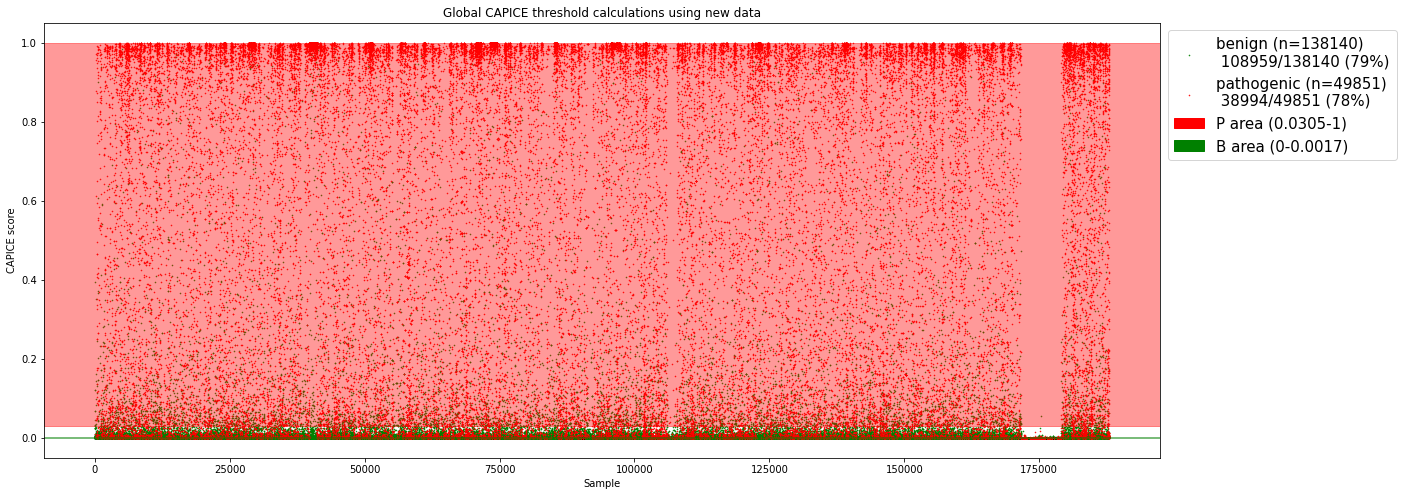

In [134]:
dot_size = 0.3
n_decimals = 4

plt.rcParams['figure.figsize'] = (20,8)

plt.axhspan(0,
            benign_upper_ci,
            0,
            1,
            color='green',
            alpha=0.4
           )

n_benign_correct = merge[(merge['probabilities'] <= benign_upper_ci) & (merge['binarized_label'] == 0)].shape[0]
n_benign_tot = merge[merge['binarized_label'] == 0].shape[0]

benign_subset = merge[merge['binarized_label'] == 0]
plt.scatter(benign_subset['sample'],
            benign_subset['probabilities'],
            s=dot_size,
            color='green',
            label=f'benign (n={benign_subset.shape[0]}) \n {n_benign_correct}/{n_benign_tot} ({round(n_benign_correct/n_benign_tot*100)}%)'
           )

plt.axhspan(patho_lower_ci,
            1,
            0,
            1,
            color='red',
            alpha=0.4
           )

n_patho_correct = merge[(merge['probabilities'] >= patho_lower_ci) & (merge['binarized_label'] == 1)].shape[0]
n_patho_tot = merge[merge['binarized_label'] == 1].shape[0]

patho_subset = merge[merge['binarized_label'] == 1]
plt.scatter(patho_subset['sample'],
            patho_subset['probabilities'],
            s=dot_size,
            color='red',
            label=f'pathogenic (n={patho_subset.shape[0]}) \n {n_patho_correct}/{n_patho_tot} ({round(n_patho_correct/n_patho_tot*100)}%)'
           )

handles, labels = plt.gca().get_legend_handles_labels()

red_patch = mpatches.Patch(color='red', label=f'P area ({round(patho_lower_ci, n_decimals)}-1)')
handles.append(red_patch)
green_patch = mpatches.Patch(color='green', label=f'B area (0-{round(benign_upper_ci, n_decimals)})')
handles.append(green_patch)
plt.legend(bbox_to_anchor=(1.0,1.0), handles=handles, prop={'size':15})

plt.ylabel('CAPICE score')
plt.xlabel('Sample')
plt.title('Global CAPICE threshold calculations using new data')

plt.show()

In [93]:
if not os.path.exists('/home/rjsietsma/PycharmProjects/capice_updatr/per_gene_thresholds'):
    os.makedirs('/home/rjsietsma/PycharmProjects/capice_updatr/per_gene_thresholds')

# Un-markdown when you want per gene threshold plots

In [135]:
thresholds = pd.DataFrame(columns=['pathogenic_quantile', 'pathogenic_lower_bound', 'pathogenic_median', 'pathogenic_upper_bound', 'benign_quantile', 'benign_lower_bound', 'benign_median', 'benign_upper_bound', 'gene_name'])
thresholds

,pathogenic_quantile,pathogenic_lower_bound,pathogenic_median,pathogenic_upper_bound,benign_quantile,benign_lower_bound,benign_median,benign_upper_bound,gene_name


In [137]:
total_genes = merge['GeneName'].unique().size
current = 0
reset_timer = time.time()


for gene in merge['GeneName'].unique():
    # Timer
    current += 1
    curr_time = time.time()
    if curr_time - reset_timer > 10:
        print(f'Still processing, currently on {current}/{total_genes}')
        reset_timer = time.time()
        
    # Subset genes
    subset = merge[merge['GeneName'] == gene]
    
    # Check if benign samples are present
    benign_subset = subset[subset['binarized_label'] == 0]
    if benign_subset.shape[0] == 0:
        total_genes -= 1
        current -= 1
        continue
        
    # Check if pathogenic samples are present
    patho_subset = subset[subset['binarized_label'] == 1]
    if patho_subset.shape[0] == 0:
        total_genes -= 1
        current -= 1
        continue
        
    
    # Calculate 95% CI around 95 quantile benign area        
    benign_scores = subset[subset['binarized_label'] == 0]['probabilities']
    percentile_benign = np.percentile(benign_scores, 95)
    benign_lower_ci, benign_med, benign_upper_ci = calc_ci(benign_scores[benign_scores <= percentile_benign])
    
    # Calculate 95% CI around 5 quantile pathogenic area (since pathogenic runs from 1 to 0)
    patho_scores = subset[subset['binarized_label'] == 1]['probabilities']
    percentile_patho = np.percentile(patho_scores, 5)
    patho_lower_ci, patho_med, patho_upper_ci = calc_ci(patho_scores[patho_scores >= percentile_patho])
    
    
    # Plot benign area from 0 to upper CI
    plt.axhspan(0,
                benign_upper_ci,
                0,
                1,
                color='green',
                alpha=0.4
               )
    
    # Metrics for benign
    n_benign_correct = subset[(subset['probabilities'] <= benign_upper_ci) & (subset['binarized_label'] == 0)].shape[0]
    n_benign_tot = subset[subset['binarized_label'] == 0].shape[0]
    
    # Plotting the samples with the metrics
    plt.scatter(benign_subset['sample'],
        benign_subset['probabilities'],
        s=dot_size,
        color='green',
        label=f'benign (n={benign_subset.shape[0]}) \n {n_benign_correct}/{n_benign_tot} ({round(n_benign_correct/n_benign_tot*100)}%)'
        )

    # Plot pathogenic area from lower CI to 1
    plt.axhspan(patho_lower_ci,
                1,
                0,
                1,
                color='red',
                alpha=0.4
               )
    
    # Metrics for pathogenic
    n_patho_correct = subset[(subset['probabilities'] >= patho_lower_ci) & (subset['binarized_label'] == 1)].shape[0]
    n_patho_tot = subset[subset['binarized_label'] == 1].shape[0]
    
    # plotting the samples with metrics
    plt.scatter(patho_subset['sample'],
                patho_subset['probabilities'],
                s=dot_size,
                color='red',
                label=f'pathogenic (n={patho_subset.shape[0]}) \n {n_patho_correct}/{n_patho_tot} ({round(n_patho_correct/n_patho_tot*100)}%)'
               )

    handles, labels = plt.gca().get_legend_handles_labels()

    red_patch = mpatches.Patch(color='red', label=f'P area ({round(patho_lower_ci, n_decimals)}-1)')
    handles.append(red_patch)
    green_patch = mpatches.Patch(color='green', label=f'B area (0-{round(benign_upper_ci, n_decimals)})')
    handles.append(green_patch)
    plt.legend(bbox_to_anchor=(1.0,1.0), handles=handles)

    plt.ylabel('CAPICE score')
    plt.xlabel('Sample')
    plt.title(f'CAPICE threshold calculations on {gene}')
    
    if not os.path.exists(f'/home/rjsietsma/PycharmProjects/capice_updatr/per_gene_thresholds/{gene[0]}'):
        os.makedirs(f'/home/rjsietsma/PycharmProjects/capice_updatr/per_gene_thresholds/{gene[0]}')
        
    save_to_thresholds = [percentile_patho, patho_lower_ci, patho_med, patho_upper_ci, percentile_benign, benign_lower_ci, benign_med, benign_upper_ci, gene]
    threshold_series = pd.Series(save_to_thresholds, index=thresholds.columns)
    thresholds = thresholds.append(threshold_series, ignore_index=True)

    plt.savefig(f'/home/rjsietsma/PycharmProjects/capice_updatr/per_gene_thresholds/{gene[0]}/{gene}.png')
    plt.clf()

print(f"Done. Total processed: {current} (out of {merge['GeneName'].unique().size} total)")

Still processing, currently on 109/13656
Still processing, currently on 220/13585
Still processing, currently on 340/13503
Still processing, currently on 432/13451
Still processing, currently on 534/13388
Still processing, currently on 641/13320
Still processing, currently on 722/13279
Still processing, currently on 850/13189
Still processing, currently on 983/13094
Still processing, currently on 1110/13005
Still processing, currently on 1193/12961
Still processing, currently on 1317/12875
Still processing, currently on 1442/12790
Still processing, currently on 1550/12719
Still processing, currently on 1628/12680
Still processing, currently on 1710/12637
Still processing, currently on 1834/12550
Still processing, currently on 1918/12505
Still processing, currently on 2012/12450
Still processing, currently on 2095/12406
Still processing, currently on 2217/12321
Still processing, currently on 2315/12261
Still processing, currently on 2402/12213
Still processing, currently on 2506/12147
S

<Figure size 1440x576 with 0 Axes>

In [138]:
thresholds.to_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/thresholds.csv.gz', index=False, compression='gzip')

# /Un-markdown

In [139]:
thresholds = pd.read_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/thresholds.csv.gz')
thresholds

,pathogenic_quantile,pathogenic_lower_bound,pathogenic_median,pathogenic_upper_bound,benign_quantile,benign_lower_bound,benign_median,benign_upper_bound,gene_name
0,0.010289,0.000000,0.010289,1.000000,0.001187,0.000000,0.000086,0.000129,ISG15
1,0.001882,0.000000,0.001882,1.000000,0.001340,0.000000,0.000034,0.000129,RP11-54O7.11
2,0.004345,0.000000,0.878294,1.000000,0.015390,0.000000,0.000040,0.000129,AGRN
3,0.005371,0.000000,0.045825,1.000000,0.055733,0.000000,0.000075,0.000129,RP11-54O7.14
4,0.001969,0.000000,0.177428,1.000000,0.000841,0.000000,0.000093,0.000129,SDF4
...,...,...,...,...,...,...,...,...,...
6038,0.299792,0.237154,0.559938,0.882723,0.000206,-0.000008,0.000034,0.000139,RAB39B
6039,0.000544,0.000756,0.001184,0.008735,0.005844,0.002339,0.002339,0.002339,RNU6-1334P
6040,0.000544,0.000756,0.001184,0.008735,0.005844,0.002339,0.002339,0.002339,RNASEH2CP1
6041,0.000684,0.002648,0.003602,0.005588,0.000659,0.000159,0.000159,0.000159,SRY


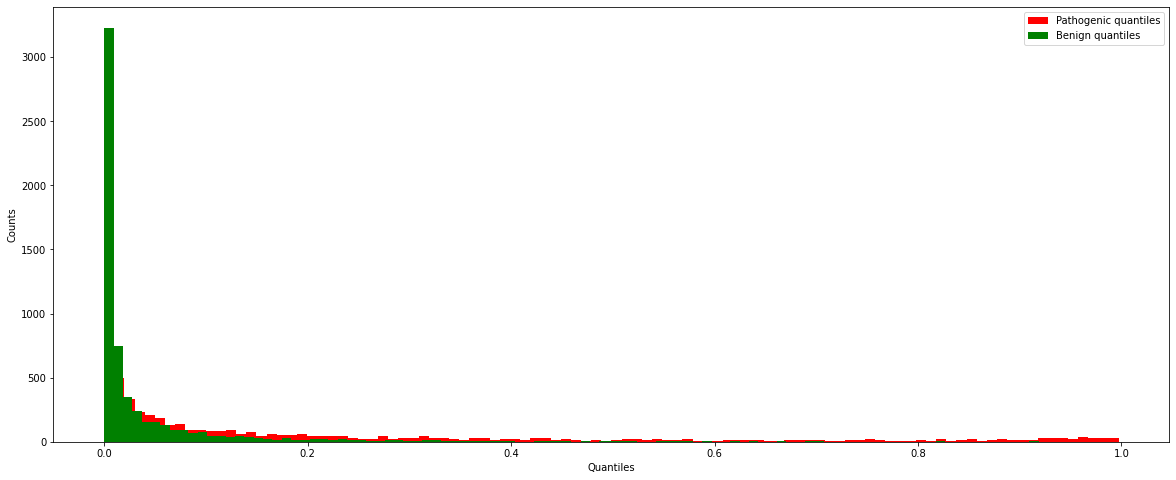

In [140]:
plt.hist(thresholds['pathogenic_quantile'], bins=100, color='red', label='Pathogenic quantiles')
plt.ylabel('Counts')
plt.xlabel('Quantiles')
plt.hist(thresholds['benign_quantile'], bins=100, color='green', label='Benign quantiles')
plt.legend()
plt.show()